In [1]:
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

In [3]:
import seaborn as sns

In [5]:
# Z minule lekce
food_sample_100 = pd.read_csv("https://kodim.cz/cms/assets/czechitas/python-data-1/python-pro-data-1/nacteni-dat/nacteni-dat/food_sample_100.csv")
food_other = pd.read_csv("https://kodim.cz/cms/assets/czechitas/python-data-1/python-pro-data-1/spojovani/sjednoceni-dat/food_other.csv")
food_nutrient = pd.read_csv("https://kodim.cz/cms/assets/czechitas/python-data-1/python-pro-data-1/podmineny-vyber/podmineny-vyber/food_nutrient.csv")
branded_food = pd.read_csv("https://kodim.cz/cms/assets/czechitas/python-data-1/python-pro-data-1/spojovani/excs/znacky/branded_food.csv")

food = pd.concat([food_sample_100, food_other])
food_brands = pd.merge(food, branded_food, on="fdc_id")

food_brands["branded_food_category"] = food_brands["branded_food_category"].replace(
    {
        "Candy": "Cukrovinky",
        "Popcorn, Peanuts, Seeds & Related Snacks": "Slané snacky",
        "Cheese": "Sýry",
        "Ice Cream & Frozen Yogurt": "Zmrzlina",
        "Chips, Pretzels & Snacks": "Chipsy",
        "Cookies & Biscuits": "Sušenky",
        "Pickles, Olives, Peppers & Relishes": "Nakl. zelenina",
        "Breads & Buns": "Pečivo",
        "Fruit & Vegetable Juice, Nectars & Fruit Drinks": "Džusy",
        "Snack, Energy & Granola Bars": "En. tyčinky",
        "Chocolate": "Čokoláda",
        "Other Snacks": "Další snacky",
    }
)

food_merged_brands = pd.merge(food_brands, food_nutrient, on="fdc_id")
food_merged_brands = food_merged_brands.rename(columns={"name": "nutrient_name"})
food_merged_brands["nutrient_name"] = food_merged_brands["nutrient_name"].replace({"Total lipid (fat)": "Lipid (tuk)"})

food_list = [
    "Cukrovinky",
    "Slané snacky",
    "Sýry",
    "Zmrzlina",
    "Chipsy",
    "Sušenky",
    "Nakl. zelenina",
    "Pečivo",
    "Džusy",
    "En. tyčinky",
    "Čokoláda",
    "Další snacky",
]

# Filtrace záznamů v food_brands, kde sloupec 'branded_food_category' obsahuje hodnoty ze seznamu food_list
food_top_cat = food_brands[food_brands["branded_food_category"].isin(
    food_list)]

# Spojení vyfiltrovaného food_top_cat s food_nutrient na základě sloupce 'fdc_id'
food_brands_nut = pd.merge(food_top_cat, food_nutrient, on="fdc_id")

# Filtrace záznamů, kde 'nutrient_name' má hodnotu 'Protein'
food_merged_brands_protein = food_merged_brands[food_merged_brands["nutrient_name"] == "Protein"]

# Filtrace záznamů, kde 'nutrient_name' je buď 'Protein' nebo 'Lipid (tuk)', a kde 'branded_food_category' má hodnotu 'En. tyčinky'
food_merged_brands_box = food_merged_brands[
    (food_merged_brands["nutrient_name"].isin(["Protein", "Lipid (tuk)"]))
    & (food_merged_brands["branded_food_category"] == "En. tyčinky")]

C:\Users\nobic\AppData\Local\Temp\ipykernel_8824\3152232916.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(food_top_cat, x="branded_food_category", palette="flare")


[Text(0.5, 0, 'Kategorie'),
 Text(0, 0.5, 'Počet potravin'),
 Text(0.5, 1.0, 'Počty potravin ve 12 nejpočetnějších kategoriích')]

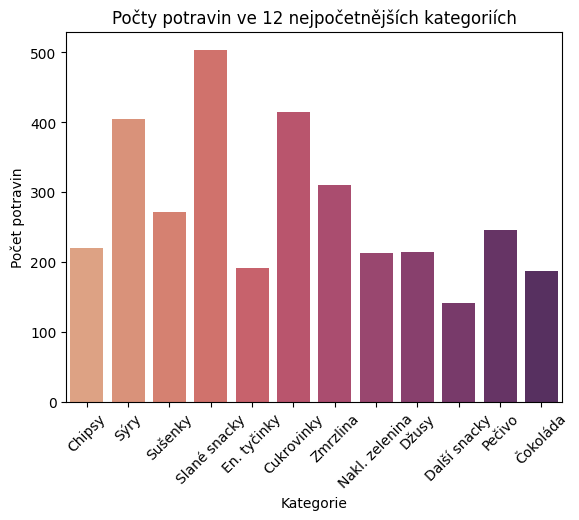

In [10]:
ax = sns.countplot(food_top_cat, x="branded_food_category", palette="flare")

# To switch axes, specify the 'y' parameter instead of 'x'
# ax = sns.countplot(data=food_top_cat, y="branded_food_category")

ax.tick_params(axis="x", rotation=45)
# ax.bar_label(ax.containers[0])
ax.set(
    xlabel="Kategorie",
    ylabel="Počet potravin",
    title="Počty potravin ve 12 nejpočetnějších kategoriích",
)

Text(0.5, 1.0, 'Histogram')

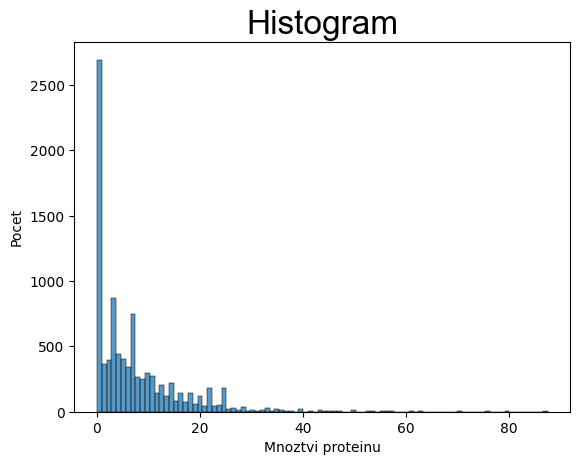

In [14]:
ax = sns.histplot(
    food_merged_brands_protein,
    x="amount",
    # bins=range(0, 100, 10), # list(range(0, 100, 10)),
    # color='r',
)

ax.set(title="Histogram", ylabel="Pocet", xlabel="Mnoztvi proteinu")

plt.title('Histogram', fontsize=24, fontfamily='Arial')

[Text(0.5, 0, 'Kategorie'),
 Text(0, 0.5, 'Množství proteinu (g)'),
 Text(0.5, 1.0, 'Průměrné množství proteinů v potravinách')]

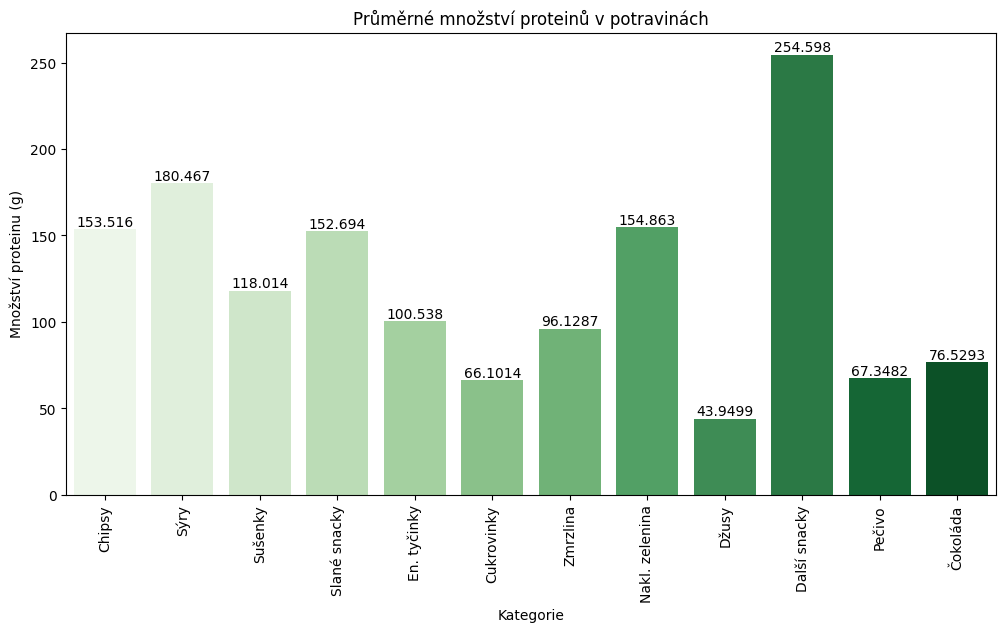

In [23]:
# # Nastavení velikosti grafu
plt.figure(figsize=(12, 6))

# Vytvoření barového grafu pomocí Seaborn
ax = sns.barplot(
    data=food_brands_nut,
    x="branded_food_category",
    y="amount",
    palette="Greens",
    hue="branded_food_category",
    errorbar=None,
)

# Nastavení parametrů os a názvu grafu
ax.tick_params(axis="x", rotation=90)
for container in ax.containers:
    ax.bar_label(container)
ax.set(
    xlabel="Kategorie",
    ylabel="Množství proteinu (g)",
    title="Průměrné množství proteinů v potravinách",
)

[Text(0.5, 0, 'Kategorie'),
 Text(0, 0.5, 'Množství v gramech'),
 Text(0.5, 1.0, 'Množství proteinů a lipidů (tuků) v potravinách')]

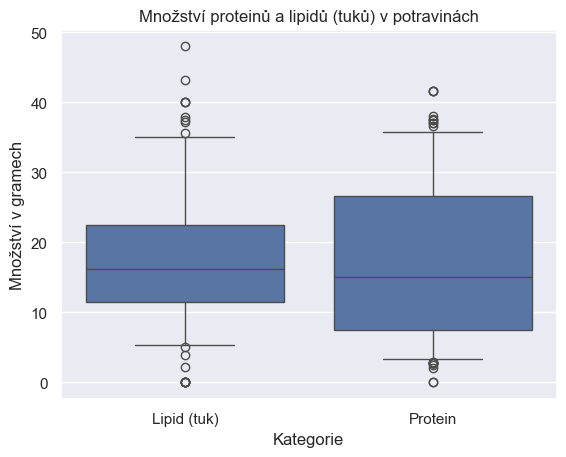

In [27]:
ax = sns.boxplot(
    food_merged_brands_box,
    x="nutrient_name",
    y="amount",
    whis=[5, 95],
    # palette="Blues",
    # hue="nutrient_name",
    # color="yellow",
)

ax.set(
    xlabel="Kategorie",
    ylabel="Množství v gramech",
    title="Množství proteinů a lipidů (tuků) v potravinách",
)

# food_merged_brands_box.groupby("nutrient_name")["amount"].describe()

In [ ]:
# Globalni nastaveni notebooku

sns.set_theme(style="darkgrid")
plt.rcParams['font.family'] = 'Arial'  # Změňte na požadovaný font

[Text(0.5, 0, 'Množství výživných látek'),
 Text(0, 0.5, 'Počet potravin'),
 Text(0.5, 1.0, 'Množství proteinu v potravinách')]

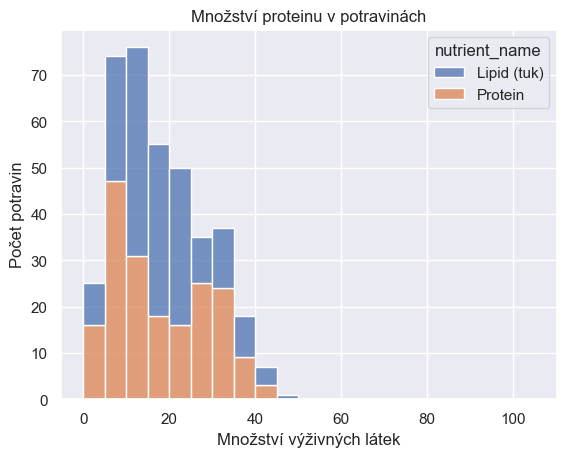

In [28]:
#cviceni
ax = sns.histplot(
    food_merged_brands_box,
    x="amount",
    bins=range(0, 110, 5),
    hue="nutrient_name",
    multiple="stack",
)

ax.set(
    xlabel="Množství výživných látek",
    ylabel="Počet potravin",
    title="Množství proteinu v potravinách",
)

In [29]:
food_brands_nut["name"] = food_brands_nut["name"].replace(
    "Carbohydrate, by difference", "Karbohydráty"
)
food_top_cat_carb_prot = food_brands_nut[
    food_brands_nut["name"].isin(["Karbohydráty", "Protein"])
]

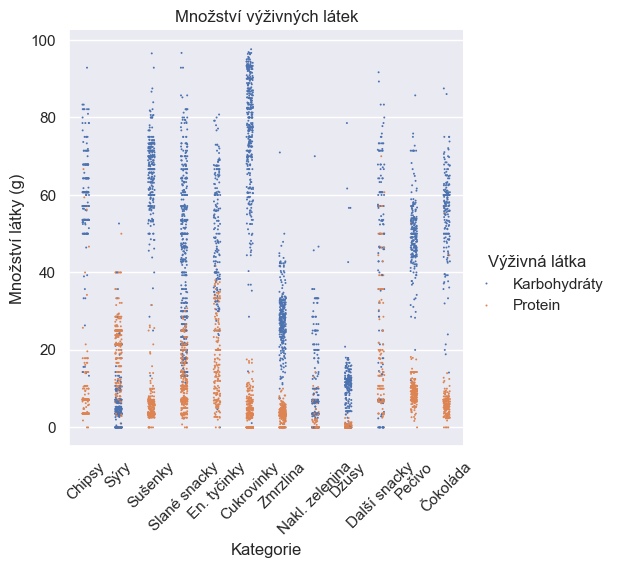

In [30]:
ax = sns.catplot(
    data=food_top_cat_carb_prot,
    x="branded_food_category",
    y="amount",
    hue="name",
    s=2,
)
ax.tick_params(axis="x", rotation=45)
ax._legend.set_title("Výživná látka")


ax.set(
    xlabel="Kategorie",
    ylabel="Množství látky (g)",
    title="Množství výživných látek",
)